In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

C:\Users\shamb\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\shamb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\shamb\AppData\Local\Temp\ipykernel_3952\2660331953.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## data loading and preprocessing 

In [3]:
df= pd.read_csv('nifty50.csv')

In [4]:
df.describe

<bound method NDFrame.describe of             Date      Open      High       Low     Close
0     04-03-2008   4958.55   4976.70   4812.95   4864.25
1     05-03-2008   4866.85   4936.75   4847.25   4921.40
2     07-03-2008   4918.30   4918.30   4672.25   4771.60
3     10-03-2008   4767.80   4814.95   4620.50   4800.40
4     11-03-2008   4796.30   4888.50   4732.85   4865.90
...          ...       ...       ...       ...       ...
3942  12-04-2024  22677.40  22726.45  22503.75  22519.40
3943  15-04-2024  22339.05  22427.45  22259.55  22272.50
3944  16-04-2024  22125.30  22213.75  22079.45  22147.90
3945  18-04-2024  22212.35  22326.50  21961.70  21995.85
3946  19-04-2024  21861.50  22179.55  21777.65  22147.00

[3947 rows x 5 columns]>

In [5]:
df.head()

,Date,Open,High,Low,Close
0,04-03-2008,4958.55,4976.70,4812.95,4864.25
1,05-03-2008,4866.85,4936.75,4847.25,4921.40
2,07-03-2008,4918.30,4918.30,4672.25,4771.60
3,10-03-2008,4767.80,4814.95,4620.50,4800.40
4,11-03-2008,4796.30,4888.50,4732.85,4865.90


In [8]:
# Ensure 'Date' is a datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Resample to business days to ensure continuity
df = df.resample('B').ffill()
print(df)

                Open      High       Low     Close
Date                                              
2008-03-04   4958.55   4976.70   4812.95   4864.25
2008-03-05   4866.85   4936.75   4847.25   4921.40
2008-03-06   4866.85   4936.75   4847.25   4921.40
2008-03-07   4918.30   4918.30   4672.25   4771.60
2008-03-10   4767.80   4814.95   4620.50   4800.40
...              ...       ...       ...       ...
2024-04-15  22339.05  22427.45  22259.55  22272.50
2024-04-16  22125.30  22213.75  22079.45  22147.90
2024-04-17  22125.30  22213.75  22079.45  22147.90
2024-04-18  22212.35  22326.50  21961.70  21995.85
2024-04-19  21861.50  22179.55  21777.65  22147.00

[4209 rows x 4 columns]


In [10]:
print(df.shape)
print(df.columns)

(4209, 4)
Index(['Open', 'High', 'Low', 'Close'], dtype='object')


In [11]:
df.head(5)

,Open,High,Low,Close
Date,,,,
2008-03-04,4958.55,4976.70,4812.95,4864.25
2008-03-05,4866.85,4936.75,4847.25,4921.40
2008-03-06,4866.85,4936.75,4847.25,4921.40
2008-03-07,4918.30,4918.30,4672.25,4771.60
2008-03-10,4767.80,4814.95,4620.50,4800.40


 ## data visualization and Analysation

 



Text(0.5, 1.0, 'NIFTY50 Cumulative Returns')

<Figure size 1440x1440 with 0 Axes>

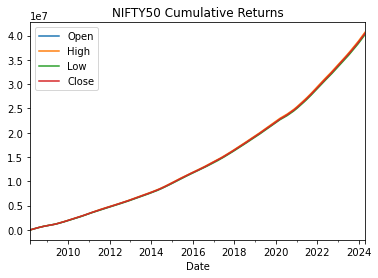

In [14]:
# Comulative Return
plt.figure(figsize=(20,20))
dr = df.cumsum()
dr.plot()
plt.title('NIFTY50 Cumulative Returns')

<AxesSubplot:ylabel='Date'>

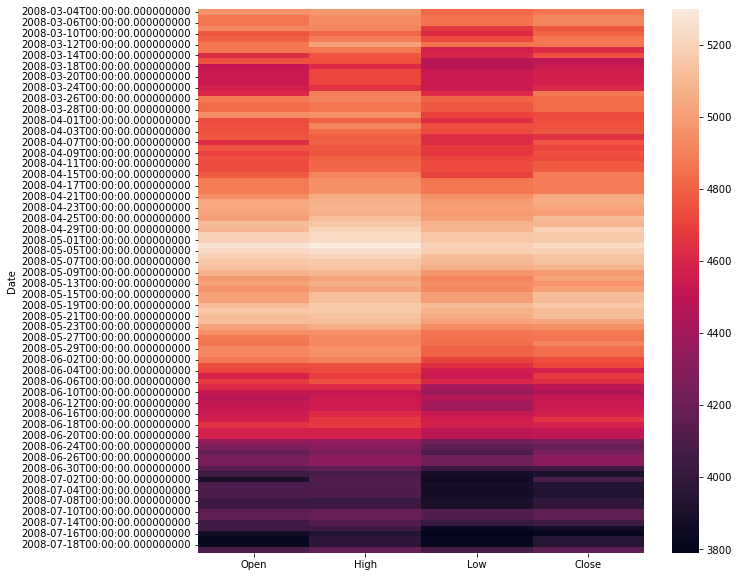

In [16]:
#drawing the heat map 
plt.figure(figsize=(10,10))
sns.heatmap(df[:100],   robust=False,
                annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, 
                 square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

(array([[0., 0., 1., 0., 1., 2., 0., 4., 2., 0.],
        [0., 0., 0., 0., 1., 1., 1., 2., 3., 2.],
        [1., 1., 2., 1., 1., 0., 4., 0., 0., 0.],
        [1., 0., 1., 0., 1., 2., 0., 3., 2., 0.]]),
 array([4482.1 , 4535.81, 4589.52, 4643.23, 4696.94, 4750.65, 4804.36,
        4858.07, 4911.78, 4965.49, 5019.2 ]),
 <a list of 4 BarContainer objects>)

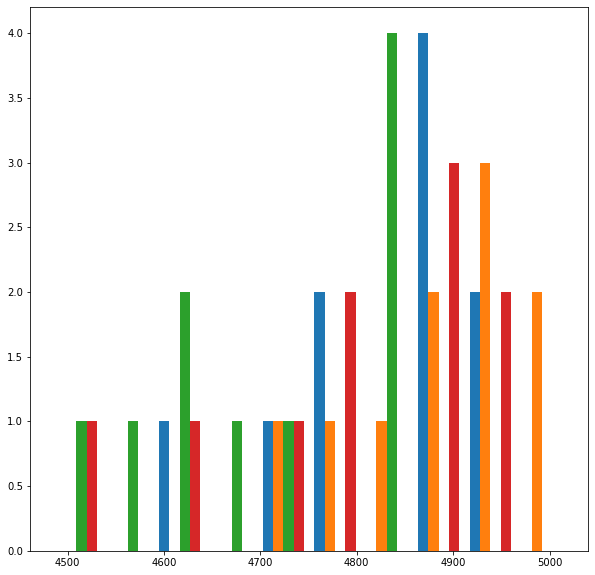

In [17]:
# histogram
plt.figure(figsize=(10,10))
plt.hist(df[:10],
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

#data splitting and feature engineering

#now we will start the preprocessing of the data

In [18]:
#LSTM is very sensitive neural network so we have to normalize the data set in the same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
#class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True)
#caler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [19]:
df.shape

(4209, 4)

In [20]:
#splitting the dataset into test train 
train=df[0:3000]
test =df[3500:]
#validate=df[2500:2999]

In [21]:
print(test.shape)
print(train.shape)

(709, 4)
(3000, 4)


(array([[144., 116., 663., 644.,  77., 398., 341., 150., 325., 142.],
        [145., 120., 694., 609.,  77., 412., 328., 154., 319., 142.],
        [147., 128., 649., 641.,  79., 392., 344., 152., 325., 143.],
        [145., 119., 668., 635.,  77., 395., 341., 151., 326., 143.]]),
 array([0.        , 0.04740878, 0.09481757, 0.14222635, 0.18963514,
        0.23704392, 0.28445271, 0.33186149, 0.37927028, 0.42667906,
        0.47408785]),
 <a list of 4 BarContainer objects>)

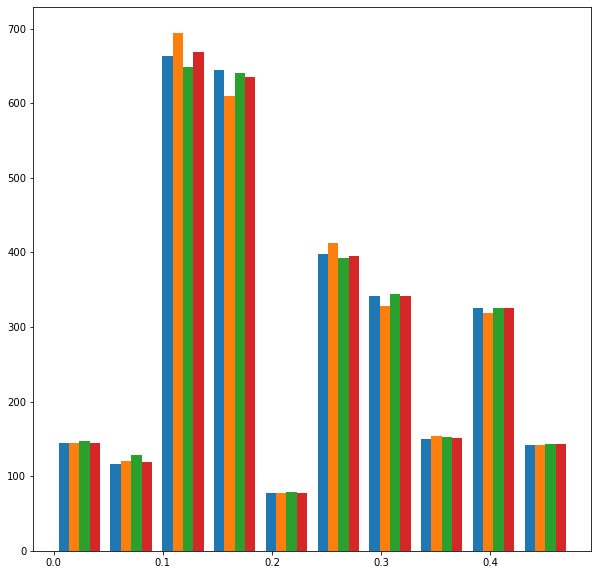

In [22]:
plt.figure(figsize=(10,10))
plt.hist(train,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

(array([[ 28.,  63., 145., 190.,  73.,  82.,  28.,  11.,  50.,  39.],
        [ 23.,  65., 131., 202.,  77.,  77.,  34.,   9.,  43.,  48.],
        [ 27.,  68., 137., 195.,  72.,  74.,  36.,  11.,  45.,  44.],
        [ 23.,  68., 127., 200.,  81.,  72.,  38.,   9.,  43.,  48.]]),
 array([0.62979954, 0.66681959, 0.70383964, 0.74085968, 0.77787973,
        0.81489977, 0.85191982, 0.88893986, 0.92595991, 0.96297995,
        1.        ]),
 <a list of 4 BarContainer objects>)

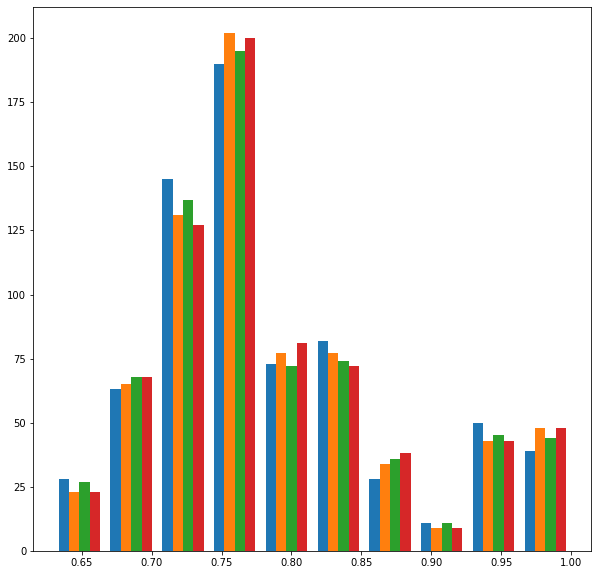

In [23]:
plt.figure(figsize=(10,10))
plt.hist(test,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

In [169]:
#scaled_train_samples=scaler.fit_transform(train)
#scaled_test_samples=scaler.fit_transform(test) 

In [24]:
import numpy as np
def create_dataset(dataset,time_stamp =1):
  X, Y = [], []
  for i in range(len(dataset)-time_stamp-1):
    a= dataset[i:(i+time_stamp),0]
    X.append(a)
    Y.append(df[i+time_stamp,0])
  return np.array(X),np.array(Y)


In [25]:
time_stamp=100
x_train, y_train=create_dataset(train,time_stamp)
x_test, y_test = create_dataset(test, time_stamp)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(2899, 100)
(608, 100)
[0.08064915 0.08500956 0.09634911 ... 0.42369398 0.41849359 0.41808596]
[0.08064915 0.08500956 0.09634911 0.09634911 0.08676608 0.0892341
 0.08226732 0.08835213 0.08920445 0.09387368 0.09237656 0.09783387
 0.09827856 0.09827856 0.09897524 0.10350118 0.0998992  0.0998992
 0.0998992  0.09410096 0.09224316 0.09087697 0.09338452 0.09338452
 0.08853001 0.08938233 0.08946385 0.08718606 0.08421406 0.09041499
 0.09041499 0.09055087 0.09816492 0.0947927  0.09052369 0.09679133
 0.09591924 0.09244821 0.09244821 0.08428077 0.07640484 0.07651602
 0.07307956 0.07307956 0.08512073 0.08388302 0.07903345 0.08083196
 0.08083196 0.07233595 0.06534446 0.06534446 0.06895879 0.07052508
 0.06379299 0.05339964 0.05327365 0.05327365 0.04821655 0.0368943
 0.04782375 0.0489997  0.03990582 0.03670407 0.0287565  0.02960635
 0.03500684 0.02661212 0.02661212 0.02661212 0.         0.
 0.0078611  0.00840461 0.017748   0.02589321 0.03110594 0.02333378
 0.01813587 0.02209112 0.03068349 0.03068349 

# start building the model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
print(x_test)
print(x_train)
print(x_train.shape)

[[0.66334386 0.67538503 0.68001472 ... 0.73357742 0.72878467 0.70646379]
 [0.67538503 0.68001472 0.68077811 ... 0.72878467 0.70646379 0.70393895]
 [0.68001472 0.68077811 0.67963921 ... 0.70646379 0.70393895 0.70850441]
 ...
 [0.85570115 0.8622183  0.86873793 ... 1.         0.99566676 0.97894895]
 [0.8622183  0.86873793 0.8729674  ... 0.99566676 0.97894895 0.96838761]
 [0.86873793 0.8729674  0.89311919 ... 0.97894895 0.96838761 0.96838761]]
[[0.12018193 0.11565105 0.11565105 ... 0.06408204 0.06408204 0.07737575]
 [0.11565105 0.11565105 0.11819318 ... 0.06408204 0.07737575 0.08064915]
 [0.11565105 0.11819318 0.11075701 ... 0.07737575 0.08064915 0.08500956]
 ...
 [0.45064949 0.44796654 0.44896956 ... 0.40384606 0.41870359 0.42395338]
 [0.44796654 0.44896956 0.4516451  ... 0.41870359 0.42395338 0.42369398]
 [0.44896956 0.4516451  0.45506426 ... 0.42395338 0.42369398 0.41849359]]
(2899, 100)


In [29]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [30]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [31]:
print(x_test.shape)
print(y_test.shape)

(608, 100, 1)
(608,)


In [32]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________


In [34]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 44s 197ms/step - loss: 6.5196e-04 - val_loss: 5.4943e-04
Epoch 2/50
164/164 [==============================] - 32s 194ms/step - loss: 0.0018 - val_loss: 5.9967e-04
Epoch 3/50
164/164 [==============================] - 29s 174ms/step - loss: 0.0031 - val_loss: 5.0900e-04
Epoch 4/50
164/164 [==============================] - 28s 173ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 5/50
164/164 [==============================] - 32s 198ms/step - loss: 0.0034 - val_loss: 5.9522e-04
Epoch 6/50
164/164 [==============================] - 30s 181ms/step - loss: 0.0036 - val_loss: 6.2119e-04
Epoch 7/50
164/164 [==============================] - 32s 193ms/step - loss: 0.0039 - val_loss: 7.2567e-04
Epoch 8/50
164/164 [==============================] - 28s 171ms/step - loss: 0.0036 - val_loss: 6.1346e-04
Epoch 9/50
164/164 [==============================] - 28s 173ms/step - loss: 0.0036 - val_loss: 6.1874e-04
Epoch 10/50
164/164 [================

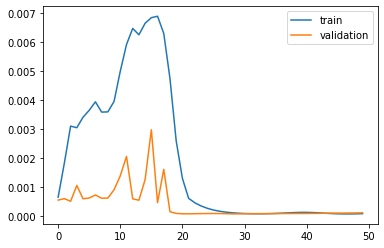

In [35]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

19/19 [==============================] - 2s 81ms/step


In [37]:
train_predict.shape

(2899, 1)

In [38]:
test_predict.shape

(608, 1)

In [39]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

19/19 [==============================] - 2s 99ms/step


In [40]:
print(x)

(array([[[0.66334386],
        [0.67538503],
        [0.68001472],
        ...,
        [0.73357742],
        [0.72878467],
        [0.70646379]],

       [[0.67538503],
        [0.68001472],
        [0.68077811],
        ...,
        [0.72878467],
        [0.70646379],
        [0.70393895]],

       [[0.68001472],
        [0.68077811],
        [0.67963921],
        ...,
        [0.70646379],
        [0.70393895],
        [0.70850441]],

       ...,

       [[0.85570115],
        [0.8622183 ],
        [0.86873793],
        ...,
        [1.        ],
        [0.99566676],
        [0.97894895]],

       [[0.8622183 ],
        [0.86873793],
        [0.8729674 ],
        ...,
        [0.99566676],
        [0.97894895],
        [0.96838761]],

       [[0.86873793],
        [0.8729674 ],
        [0.89311919],
        ...,
        [0.97894895],
        [0.96838761],
        [0.96838761]]]), array([[0.5665439 ],
       [0.56158406],
       [0.55967164],
       [0.56359553],
       [0.57012564]

In [41]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.498928181712677

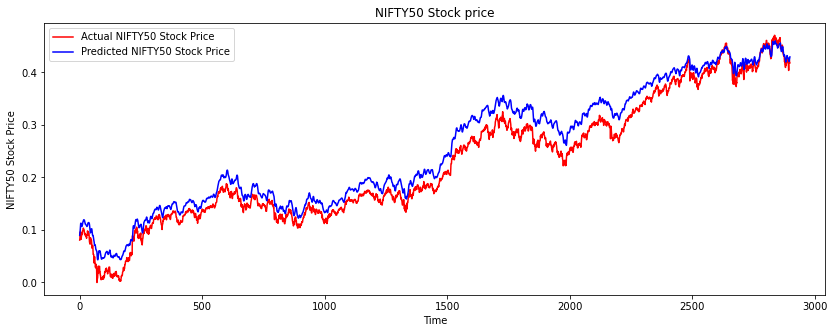

In [42]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Actual NIFTY50 Stock Price')
plt.plot(train_predict, color = 'blue', label = 'Predicted NIFTY50 Stock Price')
plt.title('NIFTY50 Stock price')
plt.xlabel('Time')
plt.ylabel('NIFTY50 Stock Price')
plt.legend()
plt.show()

In [43]:
model=Sequential()
model.add(tf.keras.layers.GRU(100,return_sequences=True,input_shape=(100,1)))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 33s 154ms/step - loss: 5.9299e-04 - val_loss: 1.4858e-04
Epoch 2/50
164/164 [==============================] - 19s 117ms/step - loss: 8.4585e-04 - val_loss: 2.1343e-04
Epoch 3/50
164/164 [==============================] - 15s 94ms/step - loss: 0.0016 - val_loss: 2.3391e-04
Epoch 4/50
164/164 [==============================] - 15s 91ms/step - loss: 0.0020 - val_loss: 2.9352e-04
Epoch 5/50
164/164 [==============================] - 15s 90ms/step - loss: 0.0022 - val_loss: 2.9165e-04
Epoch 6/50
164/164 [==============================] - 16s 97ms/step - loss: 0.0024 - val_loss: 2.9079e-04
Epoch 7/50
164/164 [==============================] - 15s 93ms/step - loss: 0.0025 - val_loss: 3.6012e-04
Epoch 8/50
164/164 [==============================] - 15s 91ms/step - loss: 0.0025 - val_loss: 5.6229e-04
Epoch 9/50
164/164 [==============================] - 15s 91ms/step - loss: 0.0022 - val_loss: 3.9890e-04
Epoch 10/50
164/164 [===============

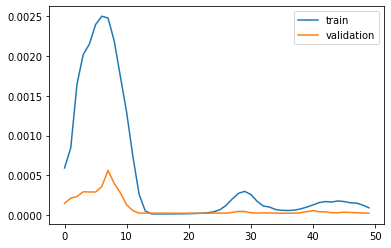

In [45]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [46]:
train_predict.shape

(2899, 1)

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

19/19 [==============================] - 1s 37ms/step


In [48]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.010649692873389153

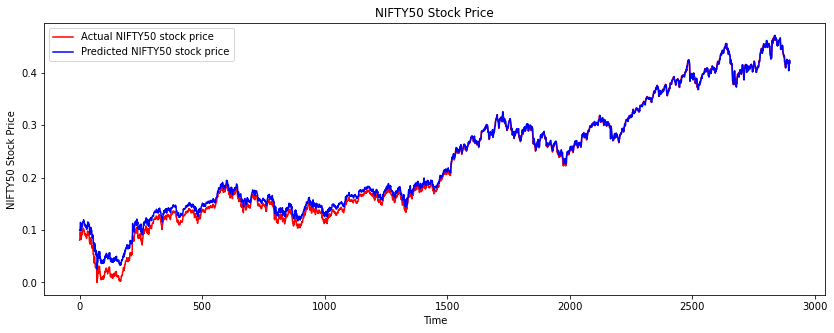

In [49]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Actual NIFTY50 stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted NIFTY50 stock price')
plt.title('NIFTY50 Stock Price')
plt.xlabel('Time')
plt.ylabel('NIFTY50 Stock Price')
plt.legend()
plt.show()

In [50]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(layer = tf.keras.layers.Dropout(.2,))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(tf.keras.layers.Dropout(.2,))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))


In [51]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=20,batch_size=16,verbose=1,)

Epoch 1/20
164/164 [==============================] - 30s 133ms/step - loss: 0.0010 - val_loss: 4.5275e-04
Epoch 2/20
164/164 [==============================] - 20s 124ms/step - loss: 0.0016 - val_loss: 4.9323e-04
Epoch 3/20
164/164 [==============================] - 17s 106ms/step - loss: 0.0023 - val_loss: 6.4176e-04
Epoch 4/20
164/164 [==============================] - 18s 108ms/step - loss: 0.0024 - val_loss: 3.5298e-04
Epoch 5/20
164/164 [==============================] - 18s 109ms/step - loss: 0.0029 - val_loss: 9.5403e-04
Epoch 6/20
164/164 [==============================] - 17s 107ms/step - loss: 0.0030 - val_loss: 7.3598e-04
Epoch 7/20
164/164 [==============================] - 20s 123ms/step - loss: 0.0024 - val_loss: 1.4683e-04
Epoch 8/20
164/164 [==============================] - 18s 110ms/step - loss: 0.0020 - val_loss: 2.1734e-04
Epoch 9/20
164/164 [==============================] - 18s 110ms/step - loss: 0.0015 - val_loss: 1.7720e-04
Epoch 10/20
164/164 [================

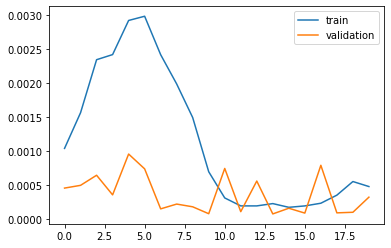

In [52]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

19/19 [==============================] - 2s 81ms/step


In [54]:
print(train_predict.shape)
print(test_predict.shape)

(2899, 1)
(608, 1)


In [55]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.03750731037565798

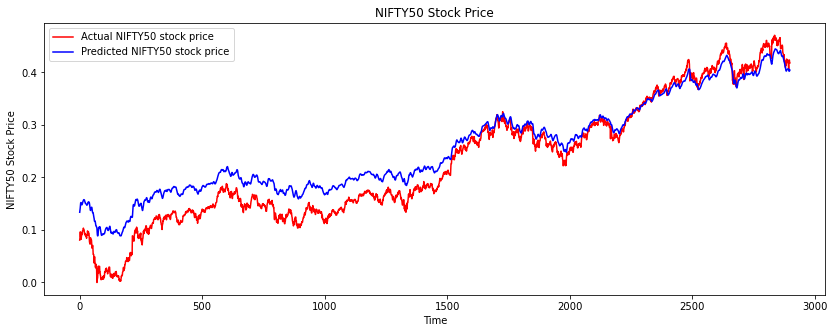

In [56]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Actual NIFTY50 stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted NIFTY50 stock price')
plt.title('NIFTY50 Stock Price')
plt.xlabel('Time')
plt.ylabel('NIFTY50 Stock Price')
plt.legend()
plt.show()